In [21]:
import collections
import itertools
import json
import os
import re
import glob
import operator

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [22]:
def compute_accuracy(rows):
    levels = ['easy', 'medium', 'hard', 'extra', 'all']
    total = collections.defaultdict(int)
    exact = collections.defaultdict(int)
    for row in rows:
        exact[row['hardness']] += row['exact']
        exact['all'] += row['exact']
        total[row['hardness']] += 1
        total['all'] += 1
    
    result = {hardness: exact[hardness] / total[hardness]
              for hardness in levels}
    result = {**result, **{'{} count'.format(hardness): total[hardness] for hardness in levels}}
    return result

In [23]:
accuracy_per_run = collections.defaultdict(dict)
rows = []
for d in sorted(glob.glob('../logs/*')):
    exp_name = os.path.basename(d)
    if "wrong" in exp_name or "test" in exp_name:
        continue
    eval_paths = glob.glob(os.path.join(d, '*eval-val-step*-bs1.jsonl*'))
    all_scores = []
    best = (0, 0)
    for eval_path in eval_paths:
        step = int(re.search('step(\d+)', eval_path).group(1))
        scores = json.load(open(eval_path))
        first_half_exact = compute_accuracy(scores['per_item'][:517])
        second_half_exact = compute_accuracy(scores['per_item'][517:])
        all_scores.append((step, scores['total_scores']['all']['exact'], first_half_exact['all'], second_half_exact['all']))
    
    all_scores.sort(key=operator.itemgetter(0))
    sorted_scores = sorted(all_scores, reverse=True, key=operator.itemgetter(1))
    rows.append((exp_name,)+( len(eval_paths),) + (sorted_scores[0] if sorted_scores else (-1, -1, -1, -1)))
    accuracy_per_run[exp_name] = {
        'x': [s[0] for s in all_scores],
        'all': [s[1] for s in all_scores],
        '1/2': [s[2] for s in all_scores],
        '2/2': [s[3] for s in all_scores],
    }
    print(d)
    
df = pd.DataFrame(rows, columns=('name', 'num steps eval', 'step', 'acc', '1/2 acc', '2/2 acc'))
df

../logs/maml-1001-try_maml
../logs/maml-1001-try_reptile
../logs/maml-1003-non_meta
../logs/maml-1007-try_maml2
../logs/maml-1010-non_meta


,name,num steps eval,step,acc,1/2 acc,2/2 acc
0,maml-1001-try_maml,19,10000,0.625725,0.607350,0.644101
1,maml-1001-try_reptile,19,10000,0.703095,0.680851,0.725338
2,maml-1003-non_meta,9,10000,0.254352,0.280464,0.228240
3,maml-1007-try_maml2,10,6100,0.399420,0.386847,0.411992
4,maml-1010-non_meta,11,10000,0.391683,0.386847,0.396518


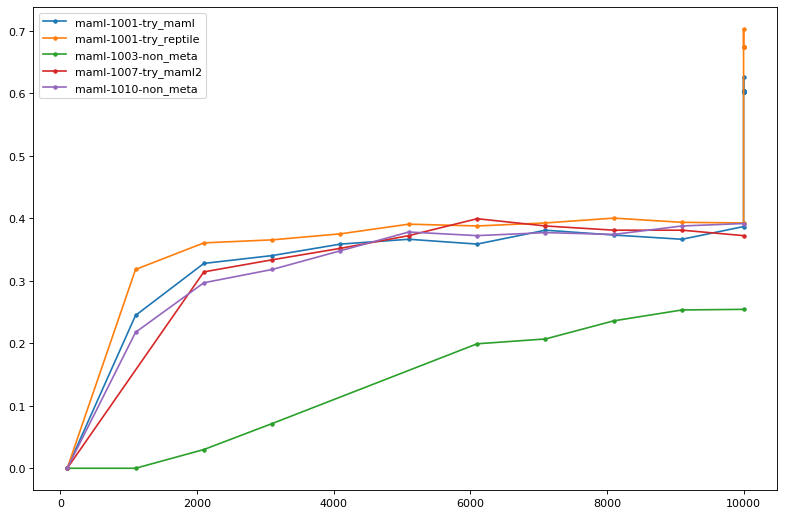

In [24]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
# See how accuracy varies over time
for k, v in sorted(accuracy_per_run.items()):
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()


In [25]:
accuracy_per_run = collections.defaultdict(dict)
rows = []
for d in sorted(glob.glob('../logs/*')):
    exp_name = os.path.basename(d)
    if "wrong" in exp_name or "test" in exp_name:
        continue
    eval_paths = glob.glob(os.path.join(d, 'ft-eval-val-step*-bs1.jsonl*'))
    all_scores = []
    best = (0, 0)
    for eval_path in eval_paths:
        ft_num = int(re.search('ft(\d+)', eval_path).group(1))
        scores = json.load(open(eval_path))
        first_half_exact = compute_accuracy(scores['per_item'][:517])
        second_half_exact = compute_accuracy(scores['per_item'][517:])
        all_scores.append((ft_num, scores['total_scores']['all']['exact'], first_half_exact['all'], second_half_exact['all']))
    
    all_scores.sort(key=operator.itemgetter(0))
    sorted_scores = sorted(all_scores, reverse=True, key=operator.itemgetter(1))
    rows.append((exp_name,)+( len(eval_paths),) + (sorted_scores[0] if sorted_scores else (-1, -1, -1, -1)))
    accuracy_per_run[exp_name] = {
        'x': [s[0] for s in all_scores],
        'all': [s[1] for s in all_scores],
        '1/2': [s[2] for s in all_scores],
        '2/2': [s[3] for s in all_scores],
    }
    print(d)
    
df = pd.DataFrame(rows, columns=('name', 'num steps eval', 'step', 'acc', '1/2 acc', '2/2 acc'))
df

../logs/maml-1001-try_maml
../logs/maml-1001-try_reptile
../logs/maml-1003-non_meta
../logs/maml-1007-try_maml2
../logs/maml-1010-non_meta


,name,num steps eval,step,acc,1/2 acc,2/2 acc
0,maml-1001-try_maml,8,0,0.625725,0.607350,0.644101
1,maml-1001-try_reptile,8,0,0.703095,0.680851,0.725338
2,maml-1003-non_meta,0,-1,-1.000000,-1.000000,-1.000000
3,maml-1007-try_maml2,0,-1,-1.000000,-1.000000,-1.000000
4,maml-1010-non_meta,0,-1,-1.000000,-1.000000,-1.000000


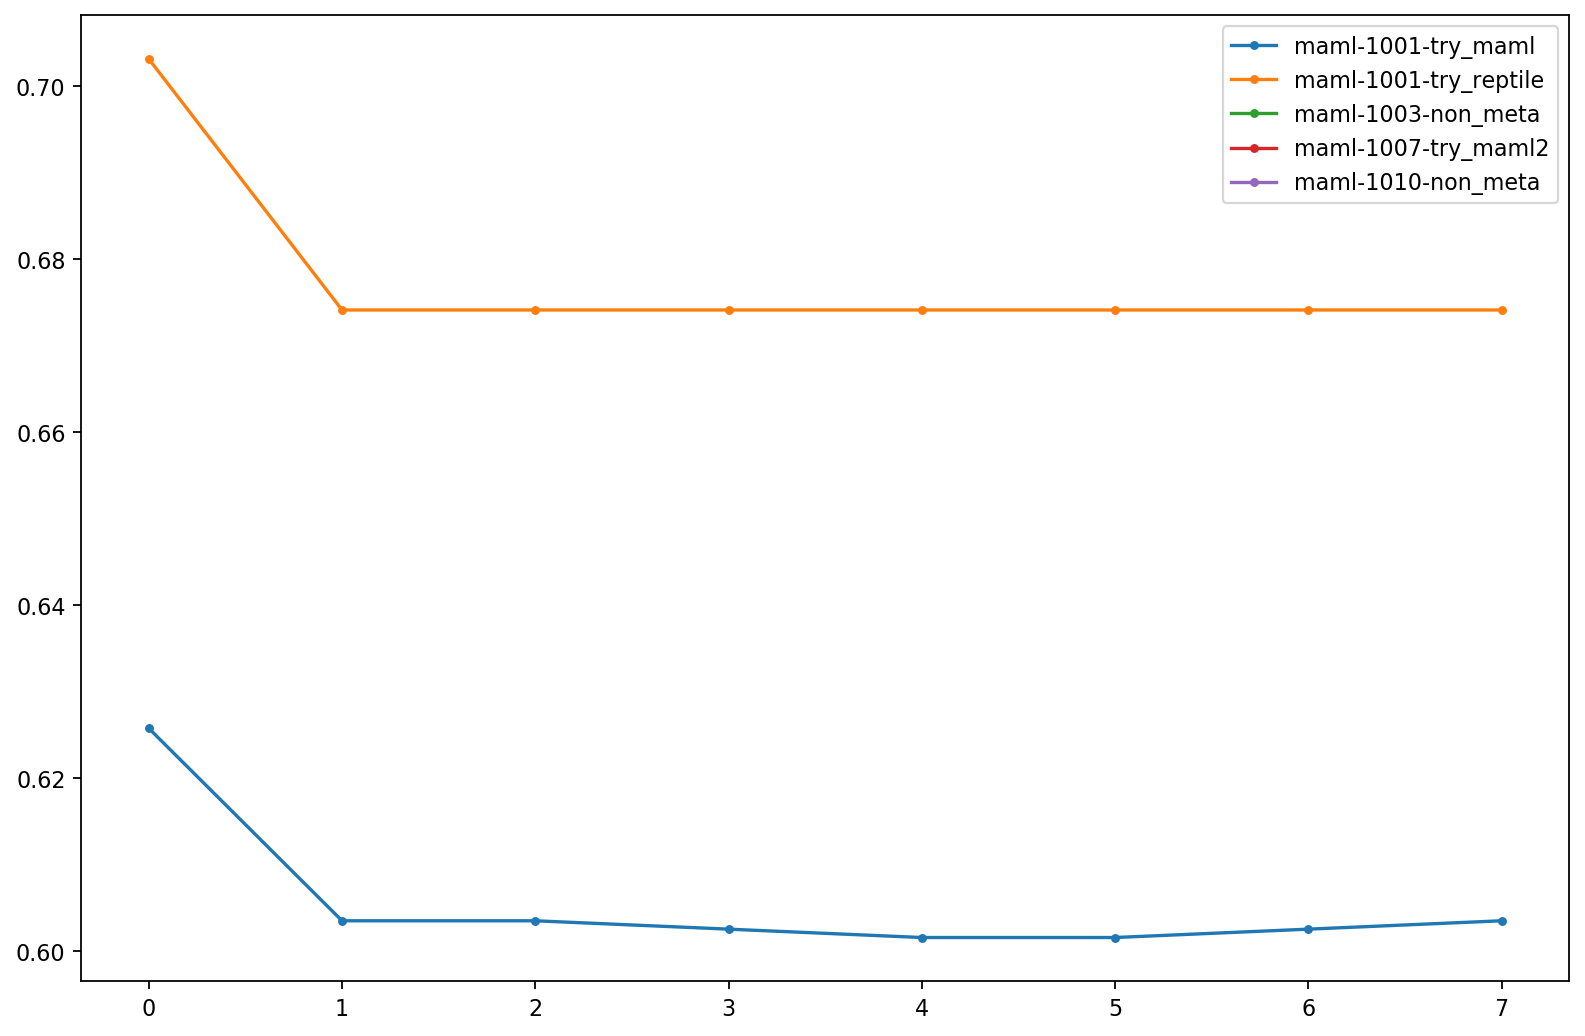

In [26]:
fig=plt.figure(figsize=(12, 8), dpi= 160, facecolor='w', edgecolor='k')
# See how accuracy varies over time
for k, v in sorted(accuracy_per_run.items()):
    plt.plot(v['x'], v['all'], marker='.', label=k)
plt.legend()
